In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
train_data = pd.read_csv('/content/drive/MyDrive/fraudDetection/fraudTrain.csv')
test_data = pd.read_csv('/content/drive/MyDrive/fraudDetection/fraudTest.csv')
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
train_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

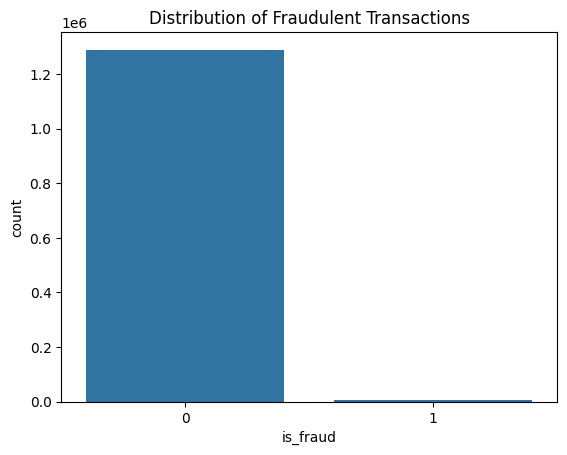

In [ ]:
# Distribution of target variable
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

In [ ]:
# Combine training and test data for encoding
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col])
    label_encoders[col] = le

# Separate the combined data back into train and test sets
train_data = combined_data.loc[:len(train_data)-1].copy()
test_data = combined_data.loc[len(train_data):].copy()


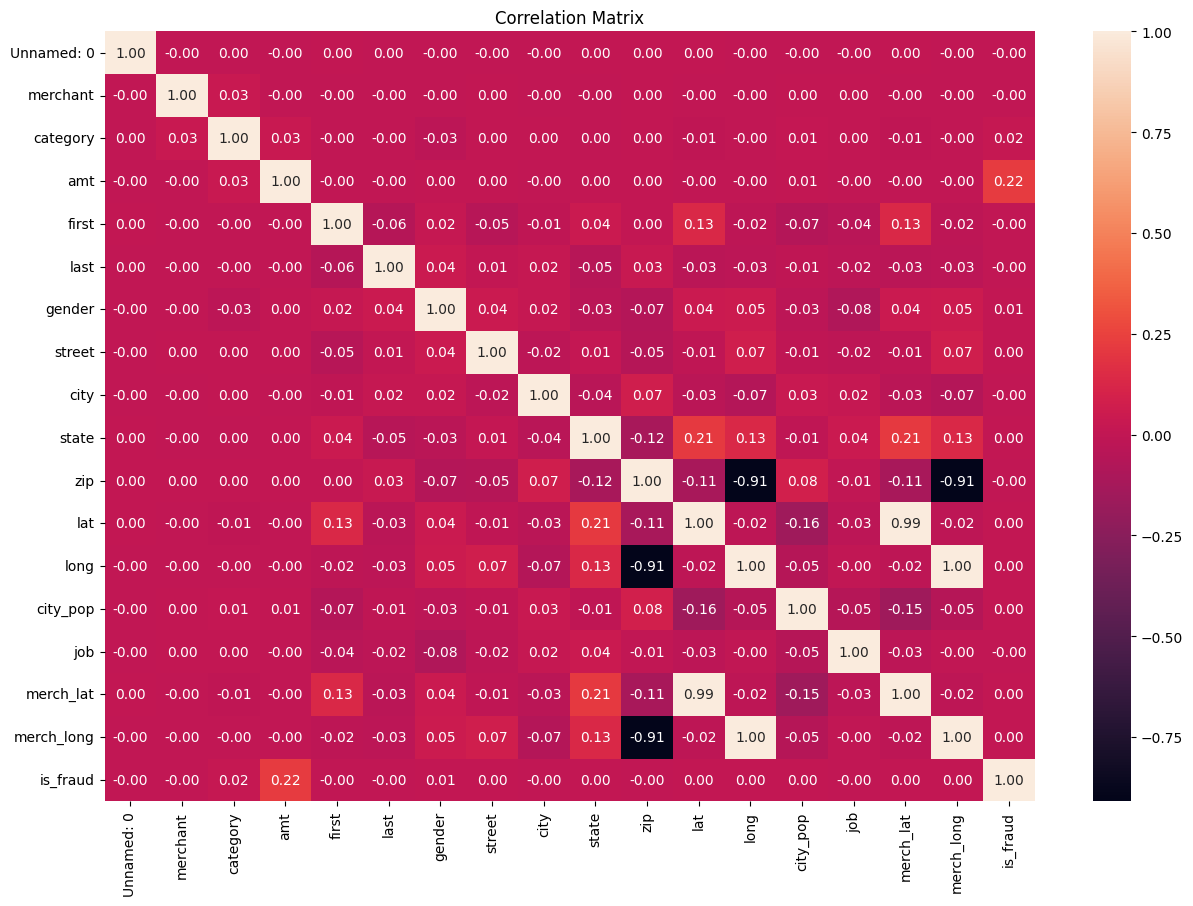

In [ ]:

# Drop non-numeric columns for correlation matrix
numeric_train_data = train_data.drop(['trans_date_trans_time', 'cc_num', 'dob', 'trans_num', 'unix_time'], axis=1)

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_train_data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


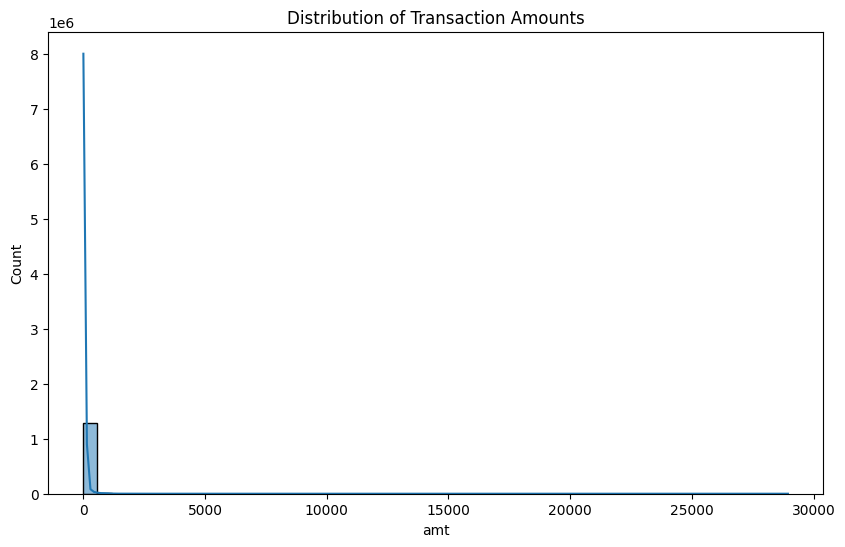

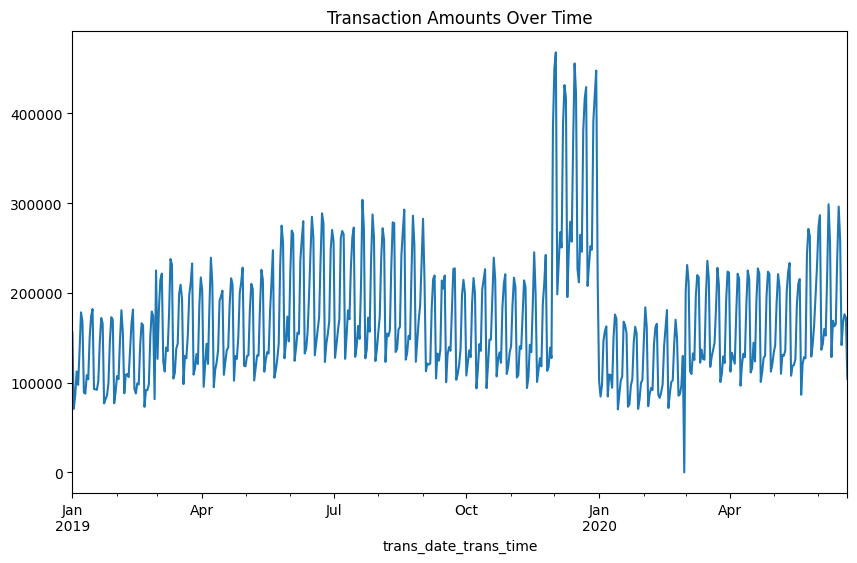

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(train_data['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

# Distribution of transactions over time
plt.figure(figsize=(10, 6))
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data.set_index('trans_date_trans_time')['amt'].resample('D').sum().plot()
plt.title('Transaction Amounts Over Time')
plt.show()


In [ ]:
# Handle missing values
train_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='ffill', inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])


In [ ]:
# Split features and labels
X_train = train_data.drop(['trans_date_trans_time', 'cc_num', 'dob', 'trans_num', 'unix_time', 'is_fraud'], axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop(['trans_date_trans_time', 'cc_num', 'dob', 'trans_num', 'unix_time', 'is_fraud'], axis=1)
y_test = test_data['is_fraud']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_log_reg))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

ROC-AUC Score: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dec_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dec_tree))


Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.49      0.54      0.51      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.77      0.76    555719
weighted avg       1.00      1.00      1.00    555719

ROC-AUC Score: 0.7669976601212534


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluate Random Forest
print("Random Forest Report:\n", classification_report(y_test, y_pred_rand_forest))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rand_forest))


Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.46      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.73      0.79    555719
weighted avg       1.00      1.00      1.00    555719

ROC-AUC Score: 0.7295839277857942
